## Spectral Clustering of Top 100 Counties to Find 20 Hidden Gems

# TODO: TRY SPECTRAL WITH PERCENTAGE OF POPULATION

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline



In [4]:
# load data
df_migration = pd.read_csv("data/Migration_Data_Top100.csv")
print(df_migration.info())
print(df_migration.columns)
display(df_migration.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8848 entries, 0 to 8847
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8848 non-null   int64  
 1   STATE_CODE_A    8848 non-null   int64  
 2   FIPS_A          8848 non-null   int64  
 3   STATE_CODE_B    8848 non-null   int64  
 4   FIPS_B          8848 non-null   int64  
 5   STATE_A         8848 non-null   object 
 6   COUNTY_A        8848 non-null   object 
 7   STATE_B         8848 non-null   object 
 8   COUNTY_B        8848 non-null   object 
 9   B_A_EST         8848 non-null   float64
 10  B_A_MOE         7895 non-null   float64
 11  A_B_EST         8848 non-null   float64
 12  A_B_MOE         7895 non-null   float64
 13  NET_B_A_EST     8848 non-null   float64
 14  NET_B_A_MOE     8848 non-null   float64
 15  GROSS_A_B_EST   8848 non-null   float64
 16  GROSS_A_B_MOE   8848 non-null   float64
 17  COUNTY_STATE_A  8848 non-null   o

,Unnamed: 0,STATE_CODE_A,FIPS_A,STATE_CODE_B,FIPS_B,STATE_A,COUNTY_A,STATE_B,COUNTY_B,B_A_EST,B_A_MOE,A_B_EST,A_B_MOE,NET_B_A_EST,NET_B_A_MOE,GROSS_A_B_EST,GROSS_A_B_MOE,COUNTY_STATE_A,COUNTY_STATE_B
0,3097,1,73,4,13,Alabama,Jefferson County,Arizona,Maricopa County,0.0,NaN,378.0,322.0,-378.0,322.0,378.0,322.0,"Jefferson County, Alabama","Maricopa County, Arizona"
1,3098,1,73,4,19,Alabama,Jefferson County,Arizona,Pima County,62.0,90.0,81.0,80.0,-19.0,119.0,143.0,123.0,"Jefferson County, Alabama","Pima County, Arizona"
2,3106,1,73,6,1,Alabama,Jefferson County,California,Alameda County,0.0,NaN,11.0,17.0,-11.0,17.0,11.0,17.0,"Jefferson County, Alabama","Alameda County, California"
3,3108,1,73,6,37,Alabama,Jefferson County,California,Los Angeles County,27.0,28.0,165.0,145.0,-138.0,149.0,192.0,146.0,"Jefferson County, Alabama","Los Angeles County, California"
4,3109,1,73,6,59,Alabama,Jefferson County,California,Orange County,26.0,40.0,18.0,20.0,8.0,44.0,44.0,45.0,"Jefferson County, Alabama","Orange County, California"


In [5]:
df_pop = pd.read_csv("data/Top100_County_Populations.csv").iloc[:,1:]
display(df_pop.head())

,County,Pop_2020
0,"Los Angeles County, California",10013976.0
1,"Cook County, Illinois",5275555.0
2,"Harris County, Texas",4731122.0
3,"Maricopa County, Arizona",4425102.0
4,"San Diego County, California",3298648.0


In [6]:
#create matrix for spectral params
df_spectral = df_migration.loc[:,['COUNTY_STATE_A', 'COUNTY_STATE_B', 'A_B_EST','B_A_EST']]
display(df_spectral.head())
print(df_spectral.shape)
matrix = df_spectral.values

,COUNTY_STATE_A,COUNTY_STATE_B,A_B_EST,B_A_EST
0,"Jefferson County, Alabama","Maricopa County, Arizona",378.0,0.0
1,"Jefferson County, Alabama","Pima County, Arizona",81.0,62.0
2,"Jefferson County, Alabama","Alameda County, California",11.0,0.0
3,"Jefferson County, Alabama","Los Angeles County, California",165.0,27.0
4,"Jefferson County, Alabama","Orange County, California",18.0,26.0


(8848, 4)


In [7]:
df_perc = df_spectral.merge(df_pop, how="left", left_on="COUNTY_STATE_A", right_on="County")
df_perc = df_perc.merge(df_pop, how="left", left_on="COUNTY_STATE_B", right_on="County", suffixes=('_x', '_B'))
#df_perc.drop(columns=["County_x", "County_B", "Pop_2020_B"], inplace=True)
df_perc["A_B_EST_p"] = df_perc.A_B_EST/df_perc.Pop_2020_x
df_perc["B_A_EST_p"] = df_perc.B_A_EST/df_perc.Pop_2020_B
display(df_perc.head())
matrix = df_perc.values

,COUNTY_STATE_A,COUNTY_STATE_B,A_B_EST,B_A_EST,County_x,Pop_2020_x,County_B,Pop_2020_B,A_B_EST_p,B_A_EST_p
0,"Jefferson County, Alabama","Maricopa County, Arizona",378.0,0.0,"Jefferson County, Alabama",674340.0,"Maricopa County, Arizona",4425102.0,0.000561,0.000000
1,"Jefferson County, Alabama","Pima County, Arizona",81.0,62.0,"Jefferson County, Alabama",674340.0,"Pima County, Arizona",1043435.0,0.000120,0.000059
2,"Jefferson County, Alabama","Alameda County, California",11.0,0.0,"Jefferson County, Alabama",674340.0,"Alameda County, California",1682349.0,0.000016,0.000000
3,"Jefferson County, Alabama","Los Angeles County, California",165.0,27.0,"Jefferson County, Alabama",674340.0,"Los Angeles County, California",10013976.0,0.000245,0.000003
4,"Jefferson County, Alabama","Orange County, California",18.0,26.0,"Jefferson County, Alabama",674340.0,"Orange County, California",3186997.0,0.000027,0.000008


In [87]:
len(set(list(df_perc.COUNTY_STATE_A)+list(df_perc.COUNTY_STATE_B)))

98

In [8]:
#create adjacency matrix

num_nodes = len(set(list(df_perc.COUNTY_STATE_A)+list(df_perc.COUNTY_STATE_B))) # number of unique ounties
adj_matrix = np.zeros((num_nodes, num_nodes)) #empty matrix
sortedCodes = sorted(set(list(df_perc.COUNTY_STATE_A)+list(df_perc.COUNTY_STATE_B))) #sorted list of counties for easy ordering and indexing

matrix[:,8] = preprocessing.scale(matrix[:,8].reshape(-1, 1)).reshape(1, -1) #scale A to B
matrix[:,9] = preprocessing.scale(matrix[:,9].reshape(-1, 1)).reshape(1, -1) #scale B to A

for edge in matrix: #for every line in the matrix
    # A to B
    node1 = sortedCodes.index(edge[0])
    node2 = sortedCodes.index(edge[1])
    weight = int(edge[8])
    adj_matrix[node1, node2] = weight
    #print(weight)
    #B to A
    weight = int(edge[9])
    adj_matrix[node2, node1] = weight

    


In [9]:
#check sparsity of adjacency
total_elements = adj_matrix.size

# Calculate number of non-zero elements
nonzero_elements = np.count_nonzero(adj_matrix)

# Calculate sparsity as a ratio of non-zero elements to total elements
sparsity = 1.0 - (nonzero_elements / total_elements)

print(sparsity) #0.97116

0.9694918783840066


In [85]:
adj_matrix.shape

(98, 98)

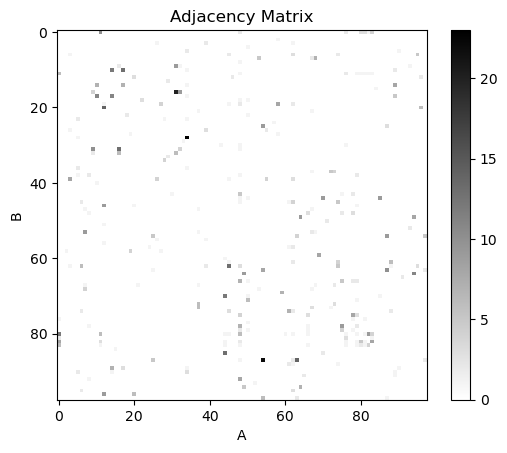

In [10]:
#display adjacency matrix
plt.imshow(adj_matrix, cmap='binary', interpolation='nearest')
plt.title('Adjacency Matrix')
plt.xlabel("A")
plt.ylabel("B")
plt.colorbar()
plt.savefig("adj_mx.png")
plt.show()

In [11]:
#Spectral Clustering Step
np.random.seed(20)
#we won't consider the top 10 most populous counties/clusters, and will have 1 cluster with all leftover counties
#so need to have desired number of hidden gems + 11 as number of clusters

degree_matrix = np.diag(np.sum(adj_matrix, axis=1)) #create degree matrix
adj_temp = (adj_matrix + adj_matrix.T)/2 #force symmetry if not already symmetric
laplacian_matrix = degree_matrix - adj_temp #create laplacian
k = 31 #examples of behavrior change are when we have 10,20,30 clusters with 2 evecs   or 31 clusters with 31 evecs
v, x= np.linalg.eig(laplacian_matrix) #v=evals, x=evecs
idx_sorted = np.argsort(v) # the index of eigenvalue sorted ascending
x = x[:, idx_sorted[-k:]] # select the k largest eigenvectors
x = x.real
v = v.real

num_clusters = k
selected_eigenvectors = x[:, 0:num_clusters] #[:, 1:num_clusters+1]

kmeans = KMeans(n_clusters=num_clusters)
labels = kmeans.fit_predict(selected_eigenvectors)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
adj_temp.shape

(98, 98)

In [13]:
unique_elements, counts = np.unique(labels, return_counts=True)
zipped_label_counts = [(x,y) for x,y in zip(unique_elements, counts)]
# Print value counts
for element, count in zipped_label_counts:
    print(f"{element}: {count}")

0: 68
1: 1
2: 1
3: 1
4: 1
5: 1
6: 1
7: 1
8: 1
9: 1
10: 1
11: 1
12: 1
13: 1
14: 1
15: 1
16: 1
17: 1
18: 1
19: 1
20: 1
21: 1
22: 1
23: 1
24: 1
25: 1
26: 1
27: 1
28: 1
29: 1
30: 1


In [14]:
for label, item in zip(labels, sortedCodes):
    if zipped_label_counts[label][1] > 1 and zipped_label_counts[label][1] < np.max(counts):
        print(f"County = {item}; label={label}")

### Below shows all the counties that are their own cluster, and are our potential hidden gems. Some are unfamiliar or surprising additions, so we will investigate further.

In [16]:
non_gem = np.argmax(counts)

for label, item in zip(labels, sortedCodes):
    if label != non_gem:
        print(df_spectral[df_spectral["COUNTY_STATE_A"] == f"{item}"].head(1).iloc[:,[0,2]])



                 COUNTY_STATE_A  A_B_EST
275  Alameda County, California      0.0
               COUNTY_STATE_A  A_B_EST
1891  Broward County, Florida     30.0
            COUNTY_STATE_A  A_B_EST
2725  Cobb County, Georgia    348.0
            COUNTY_STATE_A  A_B_EST
7484  Collin County, Texas    130.0
            COUNTY_STATE_A  A_B_EST
7580  Dallas County, Texas     13.0
              COUNTY_STATE_A  A_B_EST
2813  DeKalb County, Georgia    107.0
            COUNTY_STATE_A  A_B_EST
7676  Denton County, Texas    471.0
                                  COUNTY_STATE_A  A_B_EST
1796  District of Columbia, District of Columbia     64.0
               COUNTY_STATE_A  A_B_EST
3282  DuPage County, Illinois     78.0
               COUNTY_STATE_A  A_B_EST
7854  Fort Bend County, Texas     52.0
              COUNTY_STATE_A  A_B_EST
2904  Fulton County, Georgia    515.0
                COUNTY_STATE_A  A_B_EST
3000  Gwinnett County, Georgia     79.0
                 COUNTY_STATE_A  A_B_EST
5143  H

In [17]:
county_mask = np.ravel([labels != non_gem])
hidden_gems = np.array(sortedCodes)[county_mask]
print((hidden_gems))

['Alameda County, California' 'Broward County, Florida'
 'Cobb County, Georgia' 'Collin County, Texas' 'Dallas County, Texas'
 'DeKalb County, Georgia' 'Denton County, Texas'
 'District of Columbia, District of Columbia' 'DuPage County, Illinois'
 'Fort Bend County, Texas' 'Fulton County, Georgia'
 'Gwinnett County, Georgia' 'Hudson County, New Jersey'
 'King County, Washington' 'Middlesex County, Massachusetts'
 'New York County, New York' 'Norfolk County, Massachusetts'
 'Oakland County, Michigan' 'Orange County, California'
 'Pierce County, Washington' 'Queens County, New York'
 'Riverside County, California' 'San Bernardino County, California'
 'San Francisco County, California' 'San Mateo County, California'
 'Santa Clara County, California' 'Snohomish County, Washington'
 'Suffolk County, Massachusetts' 'Tarrant County, Texas'
 'Wayne County, Michigan']


### Making data frame to have each county's population and desigination as a gem or non-gem.

In [19]:
df_gems = pd.DataFrame(hidden_gems, columns=["County"])
df_gems = df_gems.merge(df_pop, on=["County"])
#df_gems.drop("Counties", inplace=True, axis=1)
print(df_gems.sort_values("Pop_2020", ascending=False))

                                        County   Pop_2020
18                   Orange County, California  3186997.0
4                         Dallas County, Texas  2611481.0
21                Riverside County, California  2418182.0
20                     Queens County, New York  2405425.0
13                     King County, Washington  2269697.0
22           San Bernardino County, California  2181660.0
28                       Tarrant County, Texas  2110623.0
1                      Broward County, Florida  1944381.0
25              Santa Clara County, California  1936279.0
29                      Wayne County, Michigan  1793914.0
15                   New York County, New York  1694250.0
0                   Alameda County, California  1682349.0
14             Middlesex County, Massachusetts  1632028.0
17                    Oakland County, Michigan  1274402.0
10                      Fulton County, Georgia  1066675.0
3                         Collin County, Texas  1066467.0
11            

In [20]:
df_gems["Potential_Gem"] = 1 #(df_gems.Pop_2020 < 2410000).astype("int")
df_pop2 = df_pop.merge(df_gems[["County", "Potential_Gem"]], on=["County"], how="left").fillna(0)
#df_pop2 = df_pop.merge(df_gems[["County"]], on=["County"], how="left")
display(df_pop2)

,County,Pop_2020,Potential_Gem
0,"Los Angeles County, California",10013976.0,0.0
1,"Cook County, Illinois",5275555.0,0.0
2,"Harris County, Texas",4731122.0,0.0
3,"Maricopa County, Arizona",4425102.0,0.0
4,"San Diego County, California",3298648.0,0.0
...,...,...,...
95,"Will County, Illinois",697298.0,0.0
96,"District of Columbia, District of Columbia",689548.0,1.0
97,"Bernalillo County, New Mexico",676452.0,0.0
98,"Jefferson County, Alabama",674340.0,0.0


In [21]:
#df_pop2.to_csv('data/Top100_County_20Gems.csv', index=False)  

### Make a data frame that shows the total migration in and out for each county.

In [23]:
# make data frame for movement for each gem county
#treat county as county A
gem_data = df_pop2.merge(df_migration, how="left", left_on="County", right_on="COUNTY_STATE_A")
gem_data.drop(columns=['Unnamed: 0', 'STATE_CODE_A', 'FIPS_A', 'STATE_CODE_B', 'FIPS_B',
       'STATE_A', 'COUNTY_A', 'STATE_B', 'COUNTY_B', 'B_A_MOE', 'A_B_MOE', 'NET_B_A_MOE',
       'GROSS_A_B_MOE', 'COUNTY_STATE_A', 'COUNTY_STATE_B'], inplace=True)
gem_data.head()

,County,Pop_2020,Potential_Gem,B_A_EST,A_B_EST,NET_B_A_EST,GROSS_A_B_EST
0,"Los Angeles County, California",10013976.0,0.0,165.0,27.0,138.0,192.0
1,"Los Angeles County, California",10013976.0,0.0,2891.0,8614.0,-5723.0,11505.0
2,"Los Angeles County, California",10013976.0,0.0,719.0,1719.0,-1000.0,2438.0
3,"Los Angeles County, California",10013976.0,0.0,4404.0,6538.0,-2134.0,10942.0
4,"Los Angeles County, California",10013976.0,0.0,2026.0,2080.0,-54.0,4106.0


In [24]:
#treat county as county B
gem_data = gem_data.merge(df_migration, how="left", left_on="County", right_on="COUNTY_STATE_B")
gem_data.drop(columns=['Unnamed: 0', 'STATE_CODE_A', 'FIPS_A', 'STATE_CODE_B', 'FIPS_B',
       'STATE_A', 'COUNTY_A', 'STATE_B', 'COUNTY_B', 'B_A_MOE', 'A_B_MOE', 'NET_B_A_MOE',
       'GROSS_A_B_MOE', 'COUNTY_STATE_A', 'COUNTY_STATE_B'], inplace=True)
gem_data.head()

,County,Pop_2020,Potential_Gem,B_A_EST_x,A_B_EST_x,NET_B_A_EST_x,GROSS_A_B_EST_x,B_A_EST_y,A_B_EST_y,NET_B_A_EST_y,GROSS_A_B_EST_y
0,"Los Angeles County, California",10013976.0,0.0,165.0,27.0,138.0,192.0,27.0,165.0,-138.0,192.0
1,"Los Angeles County, California",10013976.0,0.0,165.0,27.0,138.0,192.0,8614.0,2891.0,5723.0,11505.0
2,"Los Angeles County, California",10013976.0,0.0,165.0,27.0,138.0,192.0,1719.0,719.0,1000.0,2438.0
3,"Los Angeles County, California",10013976.0,0.0,165.0,27.0,138.0,192.0,6538.0,4404.0,2134.0,10942.0
4,"Los Angeles County, California",10013976.0,0.0,165.0,27.0,138.0,192.0,2080.0,2026.0,54.0,4106.0


In [25]:
gem_sums = gem_data.groupby(by="County", as_index=False).sum()
gem_sums.Potential_Gem = (gem_sums.Potential_Gem > 0).astype(int)
gem_sums.head()

,County,Pop_2020,Potential_Gem,B_A_EST_x,A_B_EST_x,NET_B_A_EST_x,GROSS_A_B_EST_x,B_A_EST_y,A_B_EST_y,NET_B_A_EST_y,GROSS_A_B_EST_y
0,"Alameda County, California",1.518320e+10,1,6391600.0,6784140.0,-392540.0,13175740.0,6784140.0,6391600.0,392540.0,13175740.0
1,"Allegheny County, Pennsylvania",1.104974e+10,0,1380296.0,1639172.0,-258876.0,3019468.0,1639172.0,1380296.0,258876.0,3019468.0
2,"Baltimore County, Maryland",6.174153e+09,0,639965.0,659090.0,-19125.0,1299055.0,659090.0,639965.0,19125.0,1299055.0
3,"Bergen County, New Jersey",6.743723e+09,0,1756440.0,1496880.0,259560.0,3253320.0,1496880.0,1756440.0,-259560.0,3253320.0
4,"Bernalillo County, New Mexico",4.773045e+09,0,741636.0,803544.0,-61908.0,1545180.0,803544.0,741636.0,61908.0,1545180.0


### Make data frame that shows the intake and output of each county, in raw numbers as well as as a percentage of its population.

In [71]:
gem_intake = gem_sums["B_A_EST_x"] #+ gem_sums["A_B_EST_y"]
gem_net = gem_sums["NET_B_A_EST_x"]
gem_gross = gem_sums["GROSS_A_B_EST_x"] #+ gem_sums["GROSS_A_B_EST_y"]

final_gem = gem_sums[["County", "Pop_2020", "Potential_Gem"]]
#final_gem = gem_sums.loc[:,["County", "Pop_2020"]]
final_gem.loc[:,["Intake"]] = gem_intake
final_gem.loc[:,["Intake_Percentage"]] = gem_intake/final_gem.Pop_2020

final_gem.loc[:,["Net_Intake"]] = gem_net
final_gem.loc[:,["Net_Intake_Percentage"]] = gem_net/final_gem.Pop_2020

final_gem.loc[:,["Output"]] = gem_gross - gem_intake
final_gem.loc[:,["Output_Percentage"]] = final_gem.Output/final_gem.Pop_2020

final_gem.loc[:,["Gross_Change"]] = gem_gross
final_gem.loc[:,["Gross_Change_Percentage"]] = gem_gross/final_gem.Pop_2020
final_gem.head()

,County,Pop_2020,Potential_Gem,Intake,Intake_Percentage,Net_Intake,Net_Intake_Percentage,Output,Output_Percentage,Gross_Change,Gross_Change_Percentage
0,"Alameda County, California",1.518320e+10,1,6391600.0,0.000421,-392540.0,-0.000026,6784140.0,0.000447,13175740.0,0.000868
1,"Allegheny County, Pennsylvania",1.104974e+10,0,1380296.0,0.000125,-258876.0,-0.000023,1639172.0,0.000148,3019468.0,0.000273
2,"Baltimore County, Maryland",6.174153e+09,0,639965.0,0.000104,-19125.0,-0.000003,659090.0,0.000107,1299055.0,0.000210
3,"Bergen County, New Jersey",6.743723e+09,0,1756440.0,0.000260,259560.0,0.000038,1496880.0,0.000222,3253320.0,0.000482
4,"Bernalillo County, New Mexico",4.773045e+09,0,741636.0,0.000155,-61908.0,-0.000013,803544.0,0.000168,1545180.0,0.000324


In [73]:
final_gem.loc[:,"Pos_Net"] = (final_gem.loc[:,"Net_Intake"] > 1).astype(int)
final_gem.loc[:,"Gem"] = ((final_gem.loc[:,"Potential_Gem"] + final_gem.loc[:,"Pos_Net"]) == 2).astype(int)

C:\Users\Kerstin\AppData\Local\Temp\ipykernel_28888\1806922900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_gem.loc[:,"Pos_Net"] = (final_gem.loc[:,"Net_Intake"] > 1).astype(int)
C:\Users\Kerstin\AppData\Local\Temp\ipykernel_28888\1806922900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_gem.loc[:,"Gem"] = ((final_gem.loc[:,"Potential_Gem"] + final_gem.loc[:,"Pos_Net"]) == 2).astype(int)


In [75]:
final_gem.head()

,County,Pop_2020,Potential_Gem,Intake,Intake_Percentage,Net_Intake,Net_Intake_Percentage,Output,Output_Percentage,Gross_Change,Gross_Change_Percentage,Pos_Net,Gem
0,"Alameda County, California",1.518320e+10,1,6391600.0,0.000421,-392540.0,-0.000026,6784140.0,0.000447,13175740.0,0.000868,0,0
1,"Allegheny County, Pennsylvania",1.104974e+10,0,1380296.0,0.000125,-258876.0,-0.000023,1639172.0,0.000148,3019468.0,0.000273,0,0
2,"Baltimore County, Maryland",6.174153e+09,0,639965.0,0.000104,-19125.0,-0.000003,659090.0,0.000107,1299055.0,0.000210,0,0
3,"Bergen County, New Jersey",6.743723e+09,0,1756440.0,0.000260,259560.0,0.000038,1496880.0,0.000222,3253320.0,0.000482,1,0
4,"Bernalillo County, New Mexico",4.773045e+09,0,741636.0,0.000155,-61908.0,-0.000013,803544.0,0.000168,1545180.0,0.000324,0,0


In [81]:
print(final_gem.sort_values("Net_Intake_Percentage", ascending=False).head(30))

                                County      Pop_2020  Potential_Gem  \
18                Denton County, Texas  7.671930e+09              1   
83      San Joaquin County, California  2.899515e+09              0   
71           Pierce County, Washington  7.133362e+09              1   
87        Snohomish County, Washington  5.842036e+09              1   
11                Collin County, Texas  9.828560e+09              1   
74                Polk County, Florida  5.362455e+09              0   
9                 Clark County, Nevada  2.131585e+10              0   
77        Riverside County, California  2.136706e+10              1   
48                 Lee County, Florida  5.891744e+09              0   
80   San Bernardino County, California  1.886918e+10              1   
44             Kern County, California  4.845281e+09              0   
69          Palm Beach County, Florida  1.262997e+10              0   
19             Denver County, Colorado  6.322370e+09              0   
29    

In [30]:
final_final_gem = final_gem.query("Gem == 1")
display(final_final_gem)

,County,Pop_2020,Potential_Gem,Intake,Intake_Percentage,Net_Intake,Net_Intake_Percentge,Output,Output_Percentage,Gross_Change,Gross_Change_Percentage,Pos_Net,Gem
7,"Broward County, Florida",1.681695e+10,1,5107560.0,0.000304,225525.0,0.000013,4882035.0,0.000290,9989595.0,0.000594,1,1
10,"Cobb County, Georgia",5.932771e+09,1,2327600.0,0.000392,515856.0,0.000087,1811744.0,0.000305,4139344.0,0.000698,1,1
11,"Collin County, Texas",9.828560e+09,1,5151360.0,0.000524,1301280.0,0.000132,3850080.0,0.000392,9001440.0,0.000916,1,1
18,"Denton County, Texas",7.671930e+09,1,5213824.0,0.000680,2151144.0,0.000280,3062680.0,0.000399,8276504.0,0.001079,1,1
21,"DuPage County, Illinois",7.389374e+09,1,2892589.0,0.000391,190371.0,0.000026,2702218.0,0.000366,5594807.0,0.000757,1,1
29,"Fort Bend County, Texas",6.227750e+09,1,2886051.0,0.000463,604998.0,0.000097,2281053.0,0.000366,5167104.0,0.000830,1,1
33,"Gwinnett County, Georgia",7.927451e+09,1,2156700.0,0.000272,145964.0,0.000018,2010736.0,0.000254,4167436.0,0.000526,1,1
64,"Norfolk County, Massachusetts",6.011443e+09,1,2447354.0,0.000407,339339.0,0.000056,2108015.0,0.000351,4555369.0,0.000758,1,1
71,"Pierce County, Washington",7.133362e+09,1,3262512.0,0.000457,1198560.0,0.000168,2063952.0,0.000289,5326464.0,0.000747,1,1
77,"Riverside County, California",2.136706e+10,1,8990254.0,0.000421,2511492.0,0.000118,6478762.0,0.000303,15469016.0,0.000724,1,1


In [31]:
list(final_final_gem.County)


['Broward County, Florida',
 'Cobb County, Georgia',
 'Collin County, Texas',
 'Denton County, Texas',
 'DuPage County, Illinois',
 'Fort Bend County, Texas',
 'Gwinnett County, Georgia',
 'Norfolk County, Massachusetts',
 'Pierce County, Washington',
 'Riverside County, California',
 'San Bernardino County, California',
 'San Mateo County, California',
 'Snohomish County, Washington',
 'Tarrant County, Texas']

In [32]:
#final_final_gem.sort_values("Net_Intake")#.iloc[-5:,]

In [33]:
final_gem.to_csv('data/Final_Hidden_Gems.csv', index=False)  